In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
from scipy.optimize import curve_fit

## Find the name or HR number of a star

In [2]:
def name_to_hr(name):
    hr, star_names = np.loadtxt("./Data/star_names.txt", delimiter=" ", unpack=True, dtype='str')
    x=True
    for i in range(0, len(star_names)):
        star_names[i] = star_names[i].upper()
        if name.upper()==star_names[i]:
            print(hr[i])
            x=False
    if x:
        print("Star "+name+" does not have HR number in this database.")
    return

def hr_to_name(HR):
    hr, star_names = np.loadtxt("./Data/star_names.txt", delimiter=" ", unpack=True, dtype='str')
    x=True
    for i in range(0, len(hr)):
        star_names[i] = star_names[i].upper()
        if 'HR'+str(HR).zfill(4)==hr[i]:
            print(star_names[i])
            x=False
    if x:
        print("Star HR "+str(HR).zfill(4)+" does not have a name in this database.")
    return

In [11]:
name_to_hr('castor') #If the name has spaces, please put '_' in the place of the space

Star castor does not have HR number in this database.


In [213]:
hr_to_name(2990)

POLLUX


## Generate Calculated values of RGB using standard filters

In [60]:
def call_star(hr_num, return_vals=False, plot=True):
    wav1, B, G, R = np.loadtxt("./Data/Tabla5-copia.csv", delimiter=";", unpack=True)
    hr, b, eb, g, eg, r, er = np.loadtxt("./Data/rgb_table.csv", delimiter=",", unpack=True)
    try:
        wav2, flux = np.loadtxt("./Data/1346_stars/hr"+str(hr_num)+".txt", unpack=True)
    except:
        print("Error: Number not contained in database")
        return None
    B_sum = 0
    G_sum = 0
    R_sum = 0
    Bref_sum = 0
    Gref_sum = 0
    Rref_sum = 0
    for i in range(len(wav2)-1):
        I = flux[i]*np.interp(wav2[i], wav1, B)*(wav2[i+1]-wav2[i])*wav2[i]
        B_sum += I
        I = 0.10885*np.interp(wav2[i], wav1, B)*(wav2[i+1]-wav2[i])/wav2[i]
        Bref_sum += I

    for i in range(len(wav2)-1):
        I = flux[i]*np.interp(wav2[i], wav1, G)*(wav2[i+1]-wav2[i])*wav2[i]
        G_sum += I
        I = 0.10885*np.interp(wav2[i], wav1, G)*(wav2[i+1]-wav2[i])/wav2[i]
        Gref_sum += I

    for i in range(len(wav2)-1):
        I = flux[i]*np.interp(wav2[i], wav1, R)*(wav2[i+1]-wav2[i])*wav2[i]
        R_sum += I
        I = 0.10885*np.interp(wav2[i], wav1, R)*(wav2[i+1]-wav2[i])/wav2[i]
        Rref_sum += I

    Bmag = -2.5*np.log10(B_sum/Bref_sum)
    Gmag = -2.5*np.log10(G_sum/Gref_sum)
    Rmag = -2.5*np.log10(R_sum/Rref_sum)
    calcmag = np.array([Bmag, Gmag, Rmag])
    calcdiff = np.array([Bmag-Gmag, Gmag-Rmag])
    
    hr_list = list(hr)
    try:
        index = hr_list.index(hr_num)
        stdmag = np.array([b[index], g[index], r[index]])
        if(plot):
            print("Standard magnitudes of B, G, and R:", b[index], g[index], r[index])
            print("Standard differences of B-G and G-R:", b[index]-g[index], g[index]-r[index])
    except:
        if(plot):
            print("Standard RGB values not available for this star.")
    
    if(plot):
        print("Calculated magnitudes of B, G, and R:" , Bmag, Gmag, Rmag)
        print("Calculated differences of B-G and G-R:", Bmag-Gmag, Gmag-Rmag)
        plt.plot(wav2[:300], (flux/max(flux))[:300], color="black", lw=0.9)
        plt.fill_between(wav1, B, alpha=0.3, color="cornflowerblue")
        plt.fill_between(wav1, G, alpha=0.3, color="green")
        plt.fill_between(wav1, R, alpha=0.3, color="red")
        plt.xlabel("Wavelength in angstrom")
        plt.ylabel("Normalized flux")
    
    if(return_vals):
        return calcmag, stdmag

Standard magnitudes of B, G, and R: -1.59 -1.49 -1.364
Standard differences of B-G and G-R: -0.10000000000000009 -0.1259999999999999
Calculated magnitudes of B, G, and R: -1.5899673201832263 -1.4897880322675214 -1.3643527901000965
Calculated differences of B-G and G-R: -0.10017928791570485 -0.12543524216742497


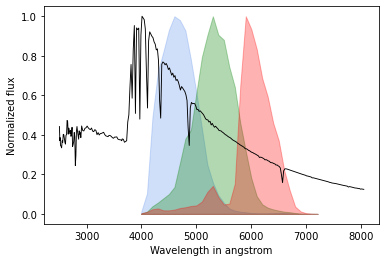

In [63]:
call_star(2491)

## Generate Calculated values of RGB using STC-7 filters

In [64]:
def call_star_stc(hr_num, return_vals=False, plot=True):
    #wav1, B, G, R = np.loadtxt("./Data/Tabla5-copia.csv", delimiter=";", unpack=True)
    wav_r, R = np.loadtxt("./Data/filters data/red.csv", delimiter=",", unpack=True)
    wav_g, G = np.loadtxt("./Data/filters data/green.csv", delimiter=",", unpack=True)
    wav_b, B = np.loadtxt("./Data/filters data/blue.csv", delimiter=",", unpack=True)
    wav_q, Q = np.loadtxt("./Data/filters data/Quantum Efficiency.csv", delimiter=",", unpack=True)
    hr, b, eb, g, eg, r, er = np.loadtxt("./Data/rgb_table.csv", delimiter=",", unpack=True)
    try:
        wav2, flux = np.loadtxt("./Data/1346_stars/hr"+str(hr_num).zfill(4)+".txt", unpack=True)
    except:
        print("Error: Number not contained in database")
        return None
    B_sum = 0
    G_sum = 0
    R_sum = 0
    Bref_sum = 0
    Gref_sum = 0
    Rref_sum = 0
    wavr = wav_r*10
    wavg = wav_g*10
    wavb = wav_b*10
    wavq = wav_q*10
    T_b = np.interp(wav2[:-1], wavb, B)*np.interp(wav2[:-1], wavq, Q)
    T_g = np.interp(wav2[:-1], wavg, G)*np.interp(wav2[:-1], wavq, Q)
    T_r = np.interp(wav2[:-1], wavr, R)*np.interp(wav2[:-1], wavq, Q)
    for i in range(len(wav2)-1):
        I = flux[i]*T_b[i]*(wav2[i+1]-wav2[i])*wav2[i]
        B_sum += I
        I = 0.10885*T_b[i]*(wav2[i+1]-wav2[i])/wav2[i]
        Bref_sum += I

    for i in range(len(wav2)-1):
        I = flux[i]*T_g[i]*(wav2[i+1]-wav2[i])*wav2[i]
        G_sum += I
        I = 0.10885*T_g[i]*(wav2[i+1]-wav2[i])/wav2[i]
        Gref_sum += I

    for i in range(len(wav2)-1):
        I = flux[i]*T_r[i]*(wav2[i+1]-wav2[i])*wav2[i]
        R_sum += I
        I = 0.10885*T_r[i]*(wav2[i+1]-wav2[i])/wav2[i]
        Rref_sum += I

    Bmag = -2.5*np.log10(B_sum/Bref_sum)
    Gmag = -2.5*np.log10(G_sum/Gref_sum)
    Rmag = -2.5*np.log10(R_sum/Rref_sum)
    calcmag = np.array([Bmag, Gmag, Rmag])
    calcdiff = np.array([Bmag-Gmag, Gmag-Rmag])
    
    hr_list = list(hr)
    try:
        index = hr_list.index(hr_num)
        stdmag = np.array([b[index], g[index], r[index]])
        if(plot):
            print("Standard magnitudes of B, G, and R:", b[index], g[index], r[index])
            print("Standard differences of B-G and G-R:", b[index]-g[index], g[index]-r[index])
    except:
        if(plot):
            print("Standard RGB values not available for this star.")
    
    if(plot):
        print("Calculated magnitudes of B, G, and R:" , Bmag, Gmag, Rmag)
        print("Calculated differences of B-G and G-R:", Bmag-Gmag, Gmag-Rmag)
        plt.plot(wav2[:300], (flux/max(flux))[:300], color="black", lw=0.9)
        plt.fill_between(wavb, B, alpha=0.3, color="cornflowerblue")
        plt.fill_between(wavg, G, alpha=0.3, color="green")
        plt.fill_between(wavr, R, alpha=0.3, color="red")
        plt.xlabel("Wavelength in angstrom")
        plt.ylabel("Normalized flux")
    
    if(return_vals):
        return calcmag, stdmag

Standard magnitudes of B, G, and R: -0.106 -0.018 0.1
Standard differences of B-G and G-R: -0.088 -0.11800000000000001
Calculated magnitudes of B, G, and R: -0.08885443529602 -0.014018863731066514 0.16546445640235563
Calculated differences of B-G and G-R: -0.07483557156495348 -0.17948332013342214
CPU times: user 54.2 ms, sys: 4.89 ms, total: 59.1 ms
Wall time: 56.6 ms


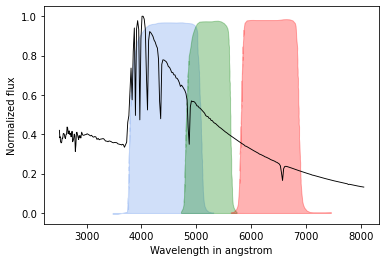

In [65]:
%%time
call_star_stc(7001)

## Transformation from STC-7 magnitudes to Standard magnitudes

In [ ]:
def stc_to_std()

# Printing and saving STC-7 magnitudes

In [69]:
%%time
hr, b, eb, g, eg, r, er = np.loadtxt("./Data/rgb_table.csv", delimiter=",", unpack=True)
stc_table = np.zeros(shape=(len(hr), 4))
j = 0
for i in hr:
    calcmag, stdmag = call_star_stc(int(i), return_vals=True, plot=False)
    stc_table[j][0] = i
    stc_table[j][1] = calcmag[0]
    stc_table[j][2] = calcmag[1]
    stc_table[j][3] = calcmag[2]
    j += 1
print(stc_table)

[[3.00000000e+00 5.39050118e+00 4.74821622e+00 4.25941323e+00]
 [5.00000000e+00 6.48958538e+00 6.08486645e+00 5.81182246e+00]
 [1.50000000e+01 1.81376701e+00 1.97816139e+00 2.22618225e+00]
 ...
 [9.09100000e+03 4.76810550e+00 4.95154986e+00 5.20845975e+00]
 [9.09800000e+03 4.34960945e+00 4.47240534e+00 4.67801675e+00]
 [9.10700000e+03 6.52772618e+00 6.15541186e+00 5.90348606e+00]]
CPU times: user 33.6 s, sys: 1.04 s, total: 34.6 s
Wall time: 35.4 s


In [70]:
np.savetxt("./Data/STC_RGB_table.txt", stc_table)

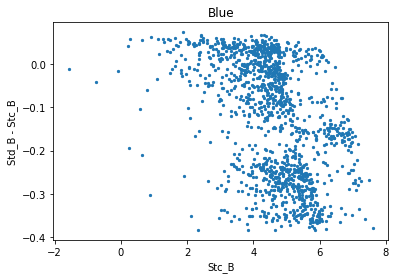

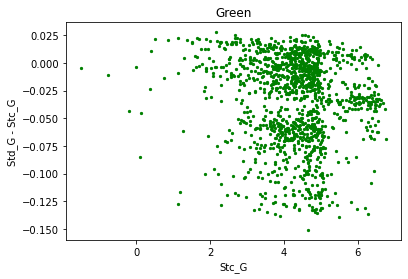

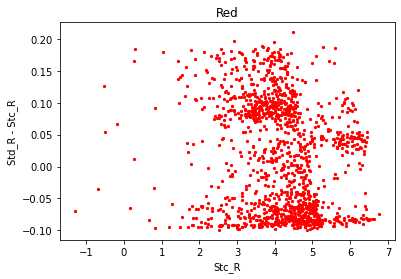

In [99]:
hr, B, G, R = np.loadtxt("./Data/STC_RGB_table.txt", delimiter=" ", unpack=True)
hr, b, eb, g, eg, r, er = np.loadtxt("./Data/rgb_table.csv", delimiter=",", unpack=True)
differences = np.zeros(shape=(len(hr), 3))
for i in range(0,len(hr),1):
    differences[i][0] = b[i]-B[i]
    differences[i][1] = g[i]-G[i]
    differences[i][2] = r[i]-R[i]
    
plt.scatter(B, differences[:,0], s=5)
plt.ylabel("Std_B - Stc_B")
plt.xlabel("Stc_B")
plt.title("Blue")
plt.show()

plt.scatter(G, differences[:,1], s=5, color="green")
plt.ylabel("Std_G - Stc_G")
plt.xlabel("Stc_G")
plt.title("Green")
plt.show()

plt.scatter(R, differences[:,2], s=5, color="red")
plt.ylabel("Std_R - Stc_R")
plt.xlabel("Stc_R")
plt.title("Red")
plt.show()

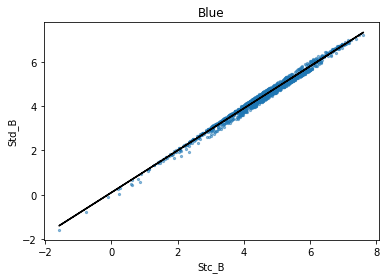

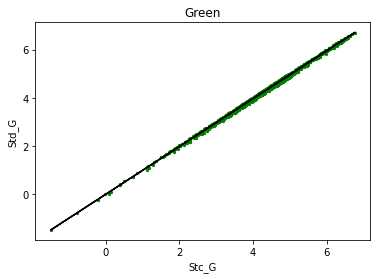

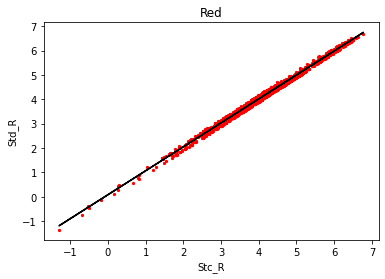

[0.95003349 0.9963901  0.98381196] [ 0.10147172 -0.01774995  0.08318065]


In [106]:
hr, B, G, R = np.loadtxt("./Data/STC_RGB_table.txt", delimiter=" ", unpack=True)
hr, b, eb, g, eg, r, er = np.loadtxt("./Data/rgb_table.csv", delimiter=",", unpack=True)

plt.scatter(B, b, s=5, alpha=0.5)
mb, cb = np.polyfit(B,b,1)
yfit = [a*mb + cb for a in B]
plt.plot(B, yfit, color="black")
plt.ylabel("Std_B")
plt.xlabel("Stc_B")
plt.title("Blue")
plt.show()

plt.scatter(G, g, s=5, color="green")
mg, cg = np.polyfit(G,g,1)
yfit = [a*mg + cg for a in G]
plt.plot(G, yfit, color="black")
plt.ylabel("Std_G")
plt.xlabel("Stc_G")
plt.title("Green")
plt.show()

plt.scatter(R, r, s=5, color="red")
mr, cr = np.polyfit(R,r,1)
yfit = [a*mr + cr for a in R]
plt.plot(R, yfit, color="black")
plt.ylabel("Std_R")
plt.xlabel("Stc_R")
plt.title("Red")
plt.show()

slopes = np.array([mb, mg, mr])
intercept = np.array([cb, cg, cr])
print(slopes, intercept)

In [ ]:
Hr, T = np.loadtxt(".Data/star_temperature.csv", delimiter=",", unpack=True)

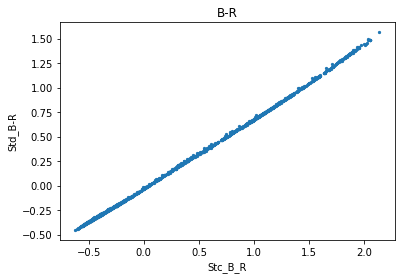

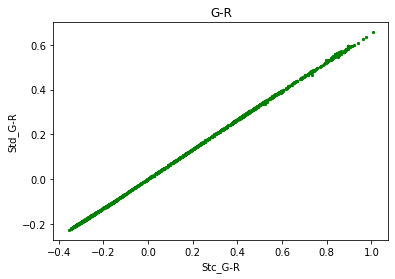

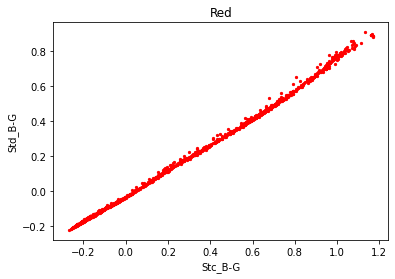

In [214]:
hr, B, G, R = np.loadtxt("./Data/STC_RGB_table.txt", delimiter=" ", unpack=True)
hr, b, eb, g, eg, r, er = np.loadtxt("./Data/rgb_table.csv", delimiter=",", unpack=True)

plt.scatter(B-R, b-r, s=5)
plt.ylabel("Std_B-R")
plt.xlabel("Stc_B_R")
plt.title("B-R")
plt.show()

plt.scatter(G-R, g-r, s=5, color="green")
plt.ylabel("Std_G-R")
plt.xlabel("Stc_G-R")
plt.title("G-R")
plt.show()

plt.scatter(B-G, b-g, s=5, color="red")
plt.ylabel("Std_B-G")
plt.xlabel("Stc_B-G")
plt.title("Red")
plt.show()